In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

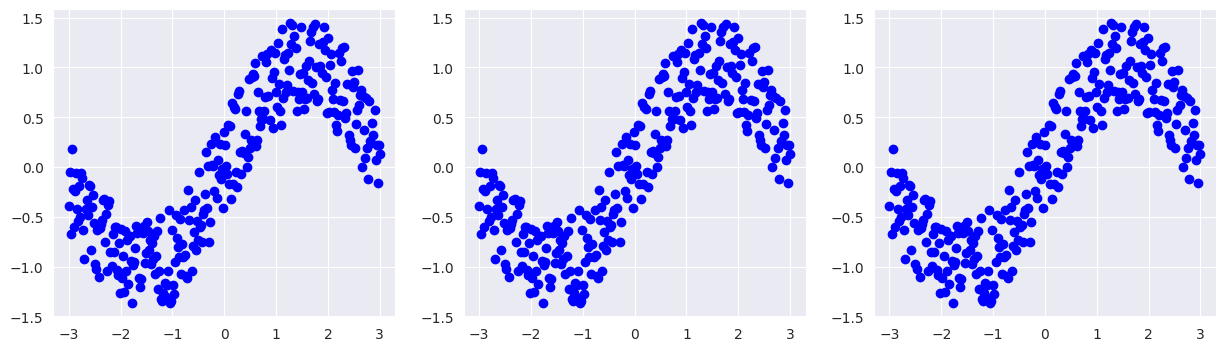

In [31]:
# 1.读取数据
# -1用于自动推断，此处是300*1
X = np.linspace(-3, 3, 300).reshape(-1, 1)

# 基于sin,叠加随机噪声
y = np.sin(X) + np.random.uniform(-0.5, 0.5, 300).reshape(-1, 1)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(X, y,  c='blue')
ax[1].scatter(X, y,  c='blue')
ax[2].scatter(X, y,  c='blue')

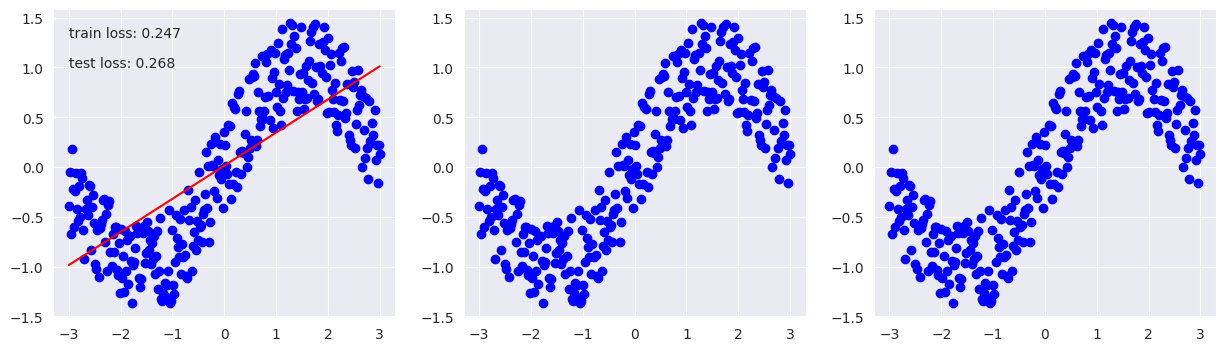

In [32]:
# 一、欠拟合
# 2.划分训练集和测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.定义损失函数和模型
model = LinearRegression()

# 4.训练模型
model.fit(trainX, trainy)

# 5.预测结果
y_pred = model.predict(testX)
test_loss = mean_squared_error(testy, y_pred)
train_loss = mean_squared_error(trainy, model.predict(trainX))

ax[0].plot(X, model.predict(X), c='red')
ax[0].text(-3, 1, f"test loss: {test_loss:.3f}")
ax[0].text(-3, 1.3, f"train loss: {train_loss:.3f}")

fig

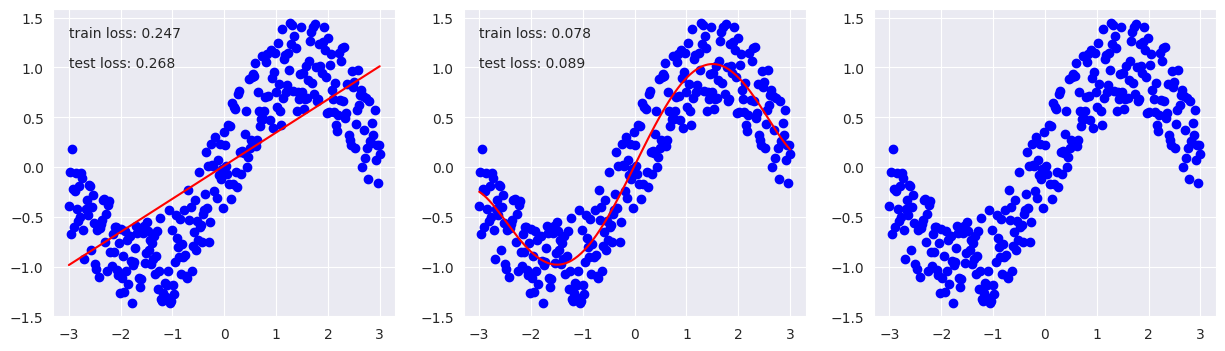

In [33]:
# 二、恰好拟合

# 从一个向量x生成(x, x^2, ... x^n)
def polynomial(X, degree):
    return np.hstack([X**i for i in range(1, degree + 1)])

# 2.划分训练集和测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

trainX_poly = polynomial(trainX, 5)
testX_poly = polynomial(testX, 5)

# 3.定义损失函数和模型
model = LinearRegression()

# 4.训练模型
model.fit(trainX_poly, trainy)

# 5.预测结果
y_pred = model.predict(testX_poly)
test_loss = mean_squared_error(testy, y_pred)
train_loss = mean_squared_error(trainy, model.predict(trainX_poly))

ax[1].plot(X, model.predict(polynomial(X, 5)), c='red')
ax[1].text(-3, 1, f"test loss: {test_loss:.3f}")
ax[1].text(-3, 1.3, f"train loss: {train_loss:.3f}")

fig

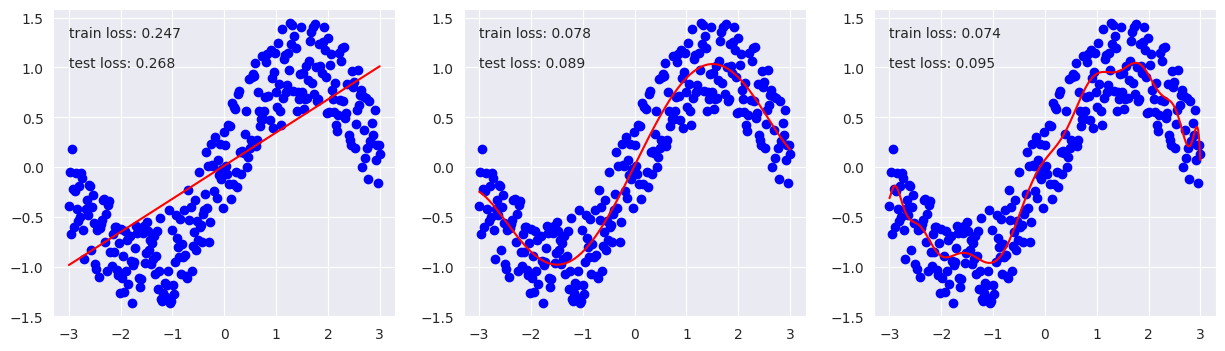

In [34]:
# 三、过拟合

# 2.划分训练集和测试集
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

trainX_poly = polynomial(trainX, 20)
testX_poly = polynomial(testX, 20)

# 3.定义损失函数和模型
model = LinearRegression()

# 4.训练模型
model.fit(trainX_poly, trainy)

# 5.预测结果
y_pred = model.predict(testX_poly)
test_loss = mean_squared_error(testy, y_pred)
train_loss = mean_squared_error(trainy, model.predict(trainX_poly))

ax[2].plot(X, model.predict(polynomial(X, 20)), c='red')
ax[2].text(-3, 1, f"test loss: {test_loss:.3f}")
ax[2].text(-3, 1.3, f"train loss: {train_loss:.3f}")

fig
